# Load Data

In [82]:
from google.colab import files
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
uploaded = files.upload()

Saving h3Videos.csv to h3Videos.csv


In [123]:
h3 = pd.read_csv(io.BytesIO(uploaded['h3Videos.csv']))

# Data Wrangling

In [124]:
# remove first column
h3.drop(['Unnamed: 0'],axis=1,inplace=True)

# rename columns
h3.columns = ['id','published_datetime','name','description','duration','view_count','like_count','comment_count']

# convert datetime_published
h3['published_datetime'] = pd.to_datetime(h3['published_datetime'],format='%Y-%m-%dT%H:%M:%SZ')

# convert duration
h3['duration'] = pd.to_timedelta(h3['duration'])

# filter out shorts
h3 = h3[h3['duration'] > '00:20:00']

# filter out videos before 2020
h3 = h3[h3['published_datetime']>'2020']

# reset index
h3.reset_index(drop=True,inplace=True)

Notes:
- Silent Libary videos are under 'Off The Rails'
- Frenemies Vlogs are under 'Frenemies'
- Off the Rail videos published before the official 'Off The Rails #1' are under 'H3 Podcast' 

In [125]:
h3.describe()

,duration,view_count,like_count,comment_count
count,400,4.000000e+02,400.000000,400.00000
mean,0 days 02:21:05.375000,1.634259e+06,43606.707500,7630.83750
std,0 days 00:44:28.022534572,1.117592e+06,33082.478821,10600.38643
min,0 days 00:20:41,2.533790e+05,9373.000000,1180.00000
25%,0 days 01:50:20,9.916032e+05,25552.250000,3249.00000
50%,0 days 02:15:08,1.259144e+06,32032.000000,4559.00000
75%,0 days 02:57:28.250000,1.814354e+06,44540.250000,7470.00000
max,0 days 04:21:50,6.728079e+06,276547.000000,140706.00000


# Exploratory Data Analysis

### Top 5 videos by views, likes, and comments.

In [ ]:
h3.nlargest(5,'view_count')

In [ ]:
h3.nlargest(5,'like_count')

In [ ]:
h3.nlargest(5,'comment_count')

### Views by month year

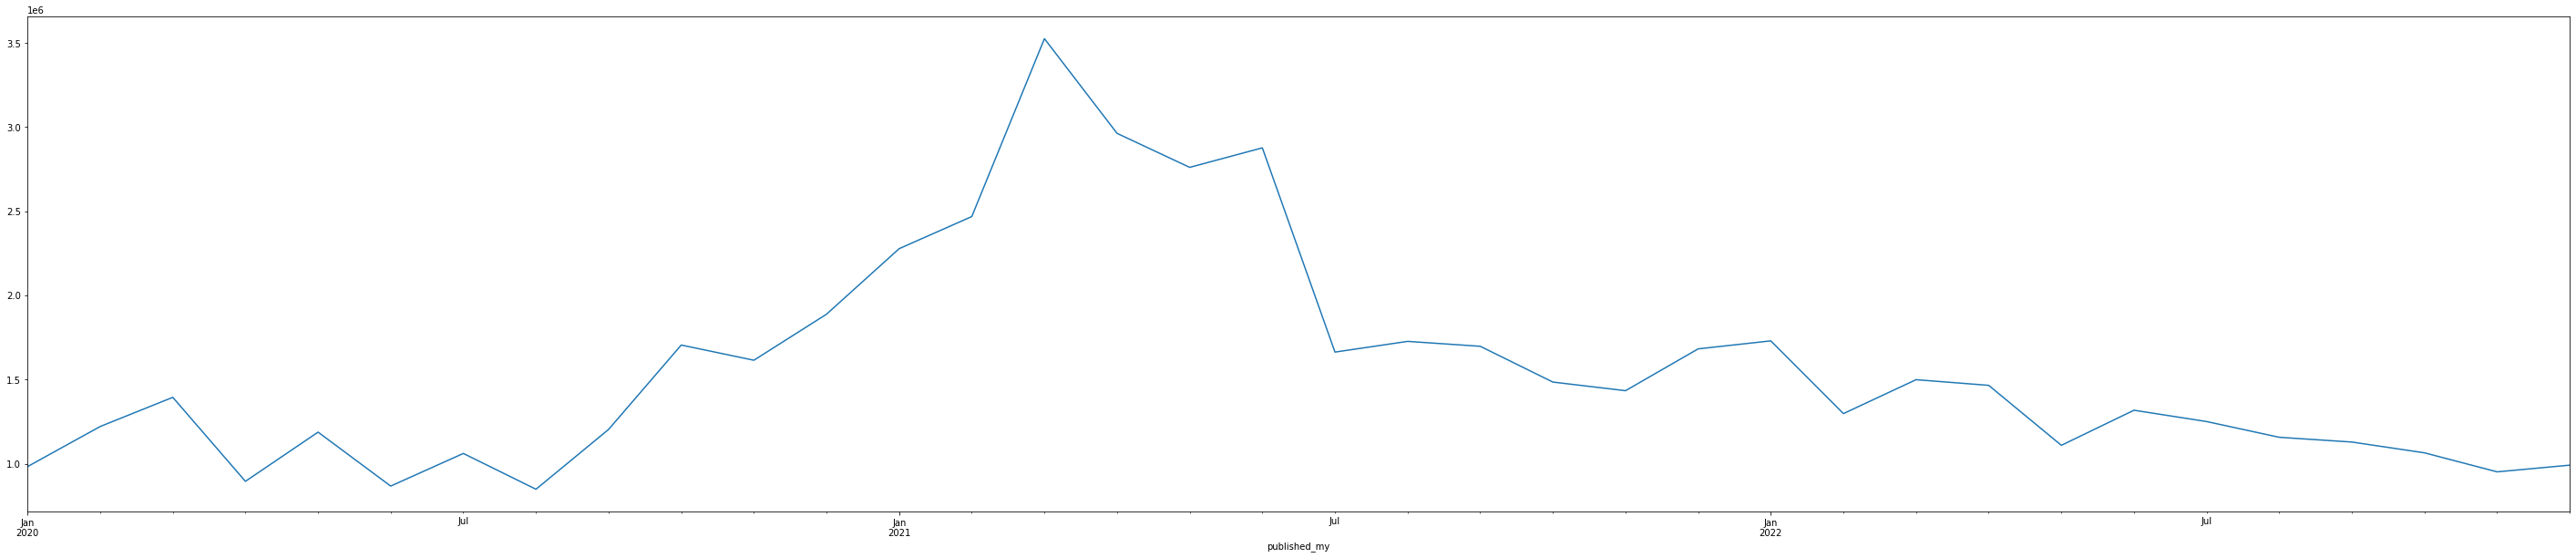

In [126]:
h3['published_my'] = h3['published_datetime'].dt.to_period('M')
h3.groupby(['published_my'])['view_count'].mean().plot(kind='line',figsize=(50,10))

### Views by week month year

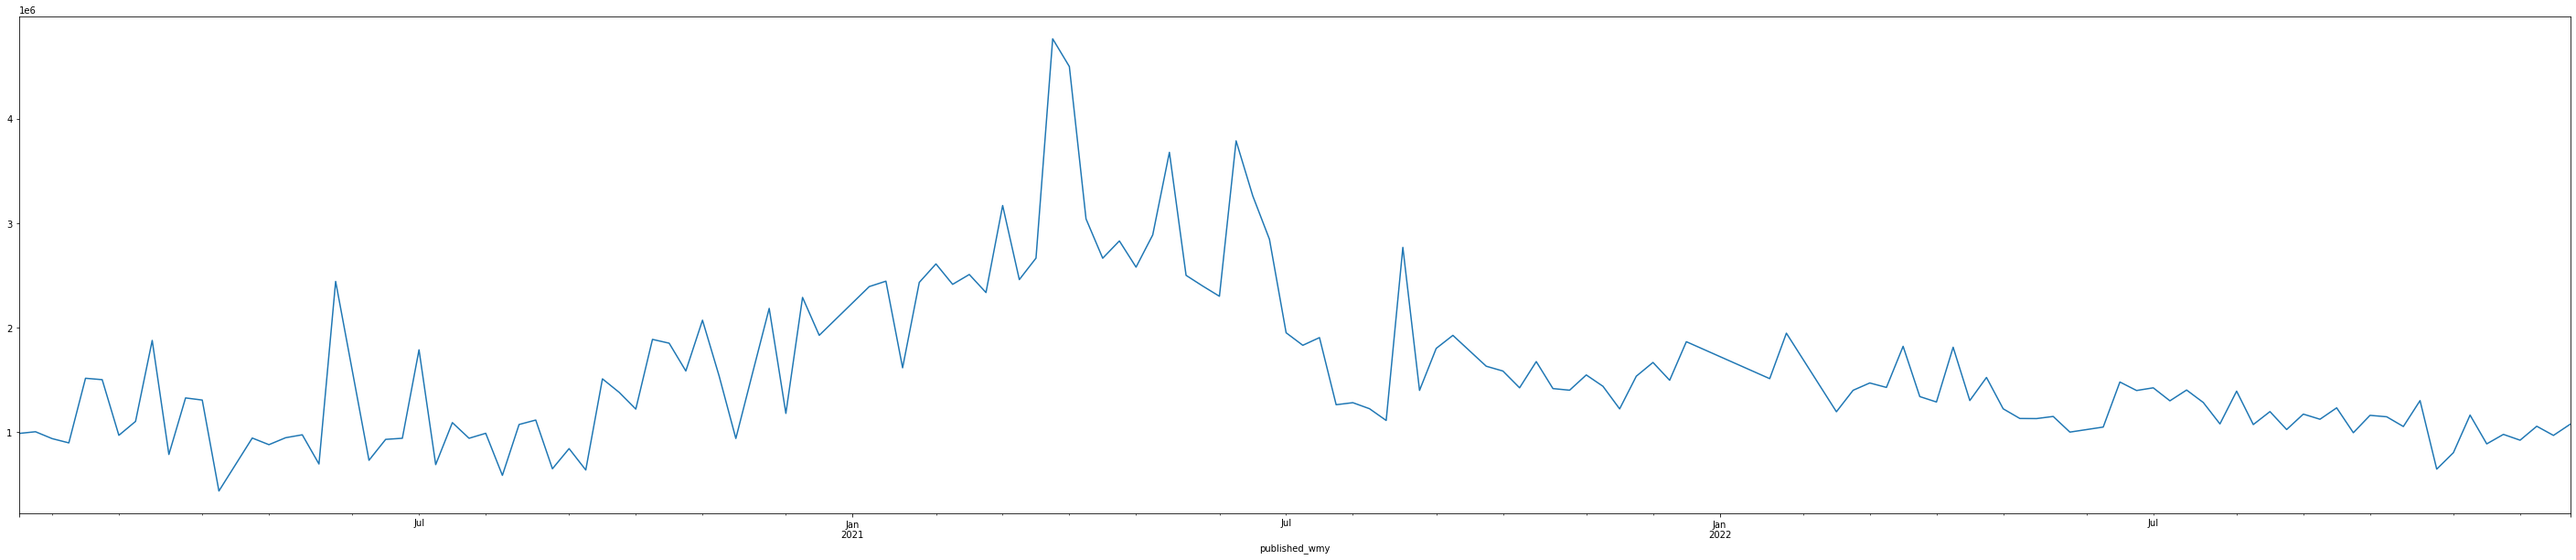

In [127]:
h3['published_wmy'] = h3['published_datetime'].dt.to_period('W')
h3.groupby(['published_wmy'])['view_count'].mean().plot(kind='line',figsize=(50,10))

### Views by series

In [128]:
# isolate series
#h3[['series','number']] = h3['series'].str.split('#',1,expand=True)
h3['series'] = np.where(h3.name.str.contains('After Dark|Afterdark'),'After Dark',
                        np.where(h3.name.str.contains('H3TV'),'H3TV',
                                 np.where(h3.name.str.contains('H3 Podcast'),'H3 Podcast',
                                          np.where(h3.name.str.contains('Off The Rails|OTR'),'Off The Rails',
                                                   np.where(h3.name.str.contains('Content Court'),'Content Court',
                                                            np.where(h3.name.str.contains('Leftovers'),'Leftovers',
                                                                     np.where(h3.name.str.contains('Frenemies'),'Frenemies',
                                                                              np.where(h3.name.str.contains('Families'),'Families',
                                                                                       'Other'))))))))
# fix miscategorised videos
h3.at[7,'series']='Off The Rails'
h3.at[40,'series']='After Dark'
h3.at[95,'series']='Off The Rails'
h3.at[126,'series']='Off The Rails'
h3.at[228,'series']='Families'

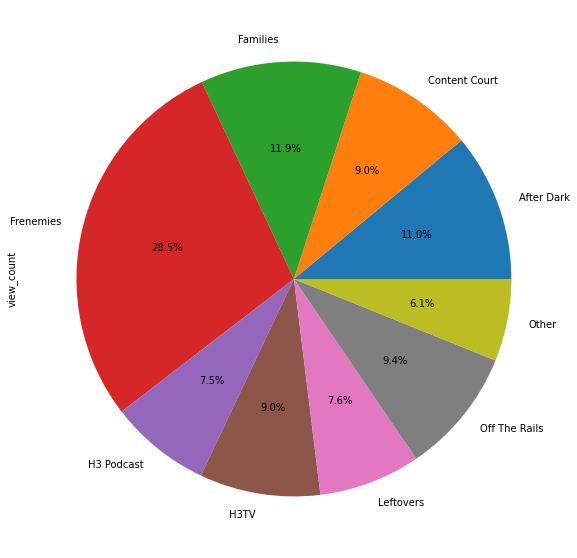

In [137]:
# pie chart to compare percentages
h3.groupby(['series'])['view_count'].mean().plot(kind='pie',autopct='%1.1f%%',figsize=(30,10))

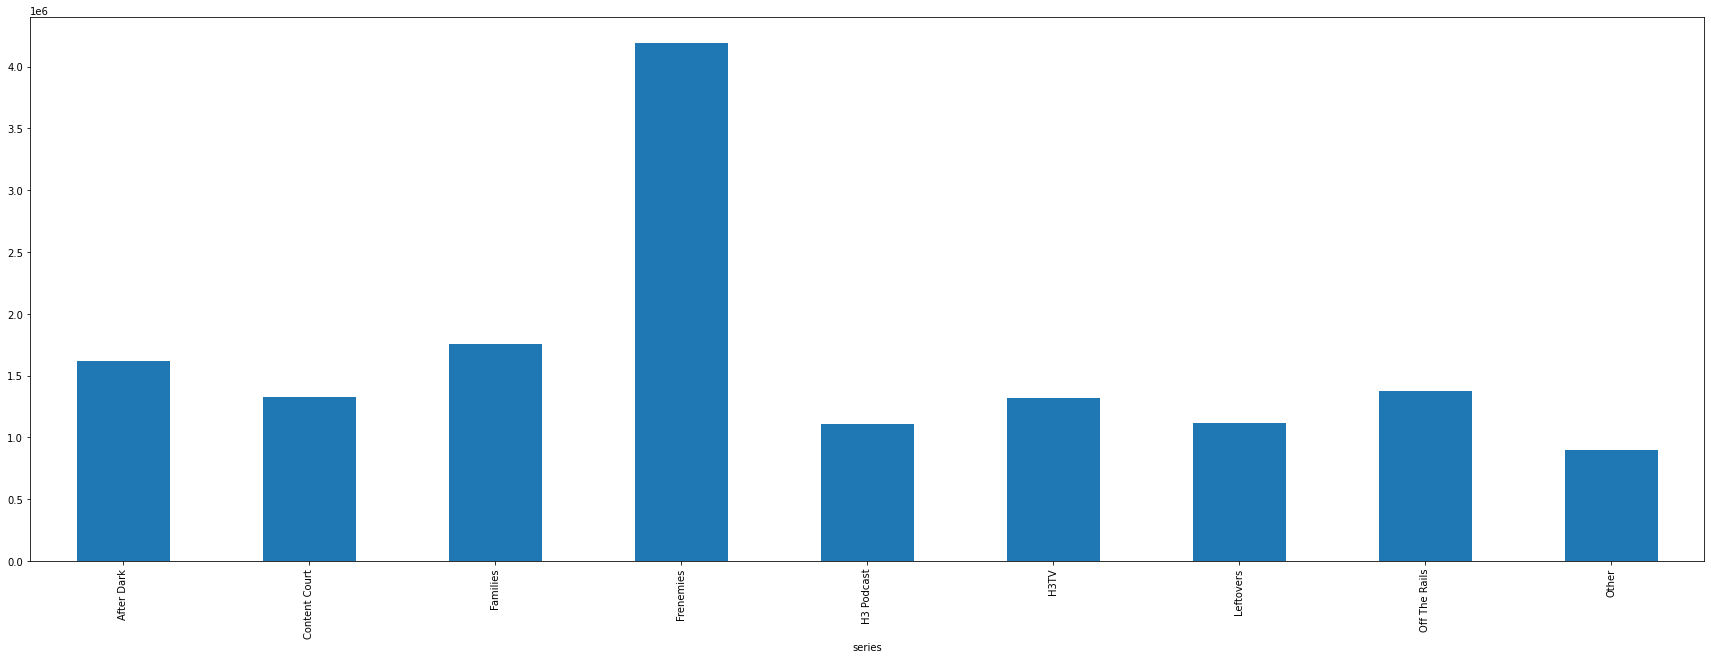

In [130]:
# bar chart to compare raw numbers
h3.groupby(['series'])['view_count'].mean().plot(kind='bar',figsize=(30,10))

# Correlation between Longer Titles and Views

In [ ]:
h3.head(50)

In [ ]:
h3[['title','series']] = h3['name'].str.rsplit('-',1,expand=True)
h3['title_len'] = h3['title'].str.len()

In [ ]:
plt.figure(figsize=(30,20))
sns.lineplot(data=h3,
             x='title_len',
             y='view_count')